# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from random import uniform

# Fixing random state for reproducibility
np.random.seed(19680801)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Задание 1

наилучший результат для логистической регрессии будет достигаться на линейно разделимой выборке, поскольку регрессия классифицирует точки, основываясь на значении экспоненты от многочлена a_1*x_1 + ... + a_m*x_m. Метод K ближайших соседей классифицирует на основе наиболее близких объектов в обучающей выборке. Следовательно, нам нужна такая выборка, которая будет как линейно разделима для регрессии, так и с объектами разных классов, которые будут часто близкими друг к другу. Например, выборка, в которой точки в пространстве признаков X1, X2, соответствующие объектам, лежат разреженно на близко расположенных двух параллельных прямых. При этом важно, чтобы на каждой прямой находились бы точки одного класса.

In [0]:
from sklearn.datasets import make_blobs

In [0]:
ns = 500

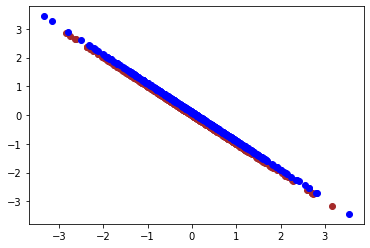

In [7]:
X, y = make_blobs(n_samples=ns, centers=1, random_state=0, center_box=(-0.05, 0.05))
transformation = [[1, -1], [-0.3, 0.3]]
G0 = np.dot(X, transformation)

X, y = make_blobs(n_samples=ns, centers=1, random_state=1, center_box=(-0.05, 0.05))
transformation = [[1, -1], [-0.3, 0.3]]
G1 = np.dot(X, transformation)
G1 += 0.05

plt.scatter(G0[:, 0], G0[:, 1], color="brown")
plt.scatter(G1[:, 0], G1[:, 1], color="blue")
plt.show()

In [0]:
X = np.concatenate((G0, G1))
labels = np.concatenate((np.zeros(ns), np.ones(ns)))
X = np.array([X[:, 0], X[:, 1], labels]).T
np.random.shuffle(X)
X, Y = X[:, 1:2], X[:, 2]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [11]:
gs = GridSearchCV(KNeighborsClassifier(), cv=5, param_grid={"n_neighbors": range(1, ns)})
gs.fit(X_train, Y_train)
KNN = gs.best_estimator_
KNN.fit(X_train, Y_train)
print("KNN результат", accuracy_score(Y_test, KNN.predict(X_test)))

KNN результат 0.484


In [12]:
gs = GridSearchCV(LogisticRegression(), cv=5, param_grid={"tol": [0.1, 0.01, 0.001], "C": [0.1, 1, 10, 100]})
gs.fit(X_train, Y_train)
LR = gs.best_estimator_
LR.fit(X_train, Y_train)

print("LR результат:", accuracy_score(Y_test, LR.predict(X_test)))

LR результат: 0.504


# Задание 2

Метод K ближайших соседей лучше всего подходит для выборок, в которых объекты одного класса лежат близко друг к другу. Соответственно для того, чтобы получить датасет, на которой KNN будет справляться лучше, чем логистическая регрессия, необходимо сгенерировать линейно неразделимую выборку, на которой будут устойчивые скопления объектов одного класса. 

Мы видим, что на данной выборке KNN справляется лучше, чем регрессия

In [0]:
from sklearn.datasets import make_circles

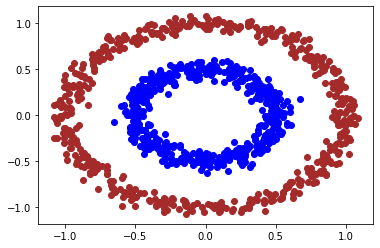

In [14]:
X = make_circles(n_samples=ns*2, factor=.5, noise=.05, shuffle=False)

G0 = X[0][:ns]
G1 = X[0][ns:]

plt.scatter(G0[:, 0], G0[:, 1], color="brown")
plt.scatter(G1[:, 0], G1[:, 1], color="blue")
plt.show()

In [0]:
X = np.concatenate((G0, G1))
labels = np.concatenate((np.zeros(ns), np.ones(ns)))
X = np.array([X[:, 0], X[:, 1], labels]).T
np.random.shuffle(X)
X, Y = X[:, 1:2], X[:, 2]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [16]:
gs = GridSearchCV(KNeighborsClassifier(), cv=5, param_grid={"n_neighbors": range(1, ns)})
gs.fit(X_train, Y_train)
KNN = gs.best_estimator_
KNN.fit(X_train, Y_train)
print("KNN результат", accuracy_score(Y_test, KNN.predict(X_test)))

KNN результат 0.828


In [17]:
gs = GridSearchCV(LogisticRegression(), cv=5, param_grid={"tol": [0.1, 0.01, 0.001], "C": [0.1, 1, 10, 100]})
gs.fit(X_train, Y_train)
LR = gs.best_estimator_
LR.fit(X_train, Y_train)

print("LR результат:", accuracy_score(Y_test, LR.predict(X_test)))

LR результат: 0.364


# Задание 3

k-NN с евклидовым расстоянием базируется на минимальном расстоянии между точками, в то время как k-NN с косинусным расстоянием – минимальном расстоянии между соответствующим элементам массива векторам. Например, косинусное расстояние между элементами (a, b) и (a*n, b*n) равно нулю, а евклидово расстояние коррелирует с n. Соответственно, для того, чтобы k-NN с косинусным расстоянием показывал результат лучше, необходимо сгенерировать датасет, в котором будут кластеры, которые довольно близки друг к другу, при этом в одном из них косинусное расстояние между любыми двумя точками должно быть минимальным.

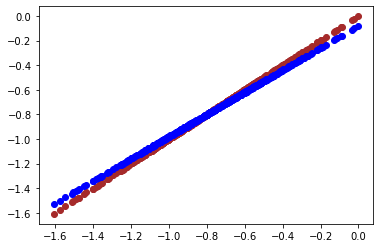

In [18]:
num_samples = 400

X, y = make_blobs(n_samples=ns, centers=1, random_state=0, center_box=(0, 0), cluster_std = 0.3)
transformation = [[-1, -1], [0.003, -0.003]]
G0 = np.dot(X, transformation)
G0 -= 0.8

X, y = make_blobs(n_samples=ns, centers=1, random_state=0, center_box=(0, 0), cluster_std = 0.3)
transformation = [[-1, -0.9], [0.003, -0.003]]
G1 = np.dot(X, transformation)
G1 -= 0.8

plt.scatter(G0[:, 0], G0[:, 1], color="brown")
plt.scatter(G1[:, 0], G1[:, 1], color="blue")
plt.show()

In [0]:
X = np.concatenate((G0, G1))
labels = np.concatenate((np.zeros(ns), np.ones(ns)))
X = np.array([X[:, 0], X[:, 1], labels]).T
np.random.shuffle(X)
X, Y = X[:, 1:2], X[:, 2]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [20]:
gs = GridSearchCV(KNeighborsClassifier(metric="cosine"), cv=5, param_grid={"n_neighbors": range(1, ns)})
gs.fit(X_train, Y_train)
KNN = gs.best_estimator_
KNN.fit(X_train, Y_train)
print("cosine результат", accuracy_score(Y_test, KNN.predict(X_test)))

cosine результат 0.504


In [21]:
gs = GridSearchCV(KNeighborsClassifier(metric="euclidean"), cv=5, param_grid={"n_neighbors": range(1, ns)})
gs.fit(X_train, Y_train)
KNN = gs.best_estimator_
KNN.fit(X_train, Y_train)
print("euclidean результат", accuracy_score(Y_test, KNN.predict(X_test)))

euclidean результат 0.468
